In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df=df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket','Cabin', 'Embarked'], axis = 1)      #df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
x=df.drop(['Survived'],axis=1)
y=df.iloc[:,0]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

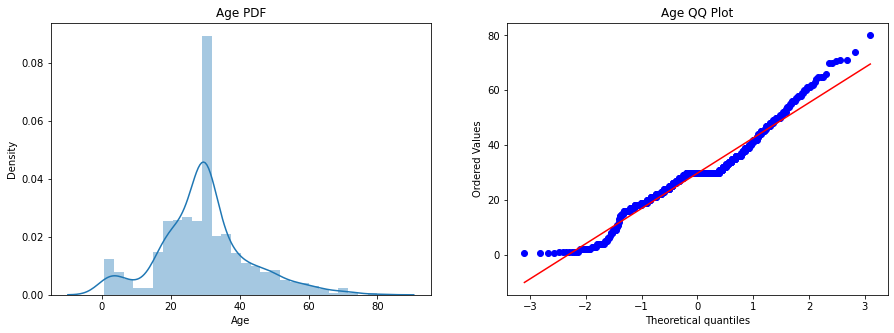

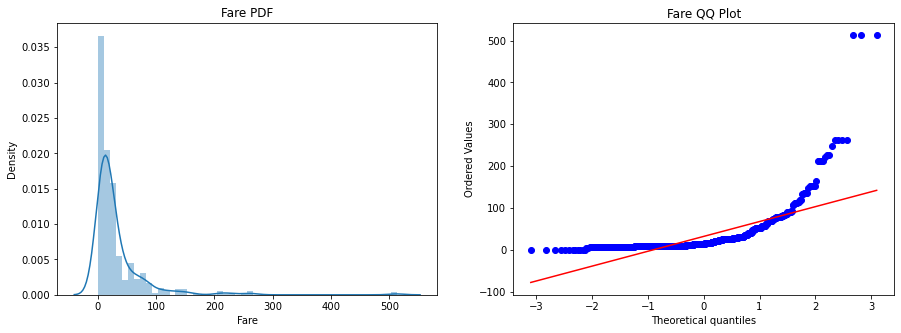

In [12]:

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [13]:
alg1=LogisticRegression()
alg2=DecisionTreeClassifier()

In [14]:
#Developing model without Transformation
alg1.fit(x_train,y_train)
alg2.fit(x_train,y_train)

y_pred1=alg1.predict(x_test)
y_pred2=alg2.predict(x_test)


print('Accuracy of Logistic Regression is', accuracy_score(y_test,y_pred1))
print('Accuracy of Decision Tree is', accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression is 0.6983240223463687
Accuracy of Decision Tree is 0.664804469273743


In [15]:
ft=FunctionTransformer(func=np.log1p)

In [16]:
x_train_transformed = ft.fit_transform(x_train)
x_test_transformed=ft.transform(x_test)

In [17]:
x_train_transformed.head()

,Age,Fare
140,3.424234,2.787834
439,3.465736,2.442347
817,3.465736,3.637697
378,3.044522,1.611935
491,3.091042,2.110213


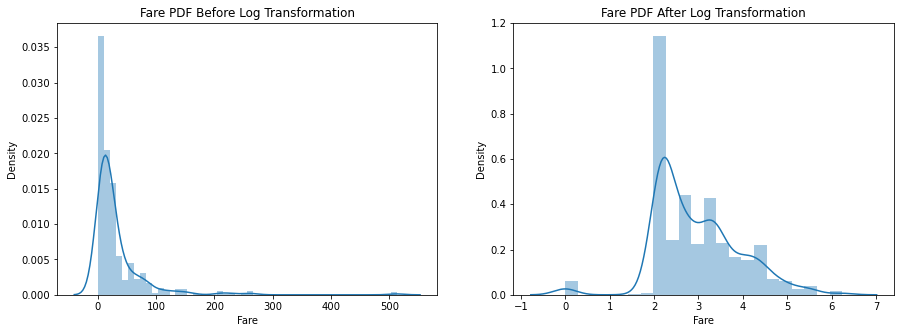

In [18]:
# Comparsion of PDF of Fare before and After applying Log Transformation
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF Before Log Transformation')

plt.subplot(122)
sns.distplot(x_train_transformed['Fare'])
plt.title('Fare PDF After Log Transformation')


plt.show()

In [19]:
#Developing model After Transformation
alg1.fit(x_train_transformed,y_train)
alg2.fit(x_train_transformed,y_train)

y_pred1=alg1.predict(x_test_transformed)
y_pred2=alg2.predict(x_test_transformed)


print('Accuracy of Logistic Regression is', accuracy_score(y_test,y_pred1))
print('Accuracy of Decision Tree is', accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression is 0.7039106145251397
Accuracy of Decision Tree is 0.6759776536312849


In [20]:
x_transformed=ft.fit_transform(x)

In [21]:
# Checking the accuracy with cross-validation
alg1.fit(x_train_transformed,y_train)
alg2.fit(x_train_transformed,y_train)

y_pred1=alg1.predict(x_test_transformed)
y_pred2=alg2.predict(x_test_transformed)


print('Accuracy of Logistic Regression is',np.mean(cross_val_score(alg1,x_transformed,y,scoring='accuracy',cv=10)))
print('Accuracy of Decision Tree is',np.mean(cross_val_score(alg2,x_transformed,y,scoring='accuracy',cv=10)))


Accuracy of Logistic Regression is 0.678027465667915
Accuracy of Decision Tree is 0.6543695380774033


In [22]:
# Applying the log transformation only on Fare column as Age was already normally distributed

trf=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2=trf.fit_transform(x_train)
x_test_transformed2=trf.transform(x_test)

alg1.fit(x_train_transformed2,y_train)
alg2.fit(x_train_transformed2,y_train)

y_pred1=alg1.predict(x_test_transformed2)
y_pred2=alg2.predict(x_test_transformed2)


print('Accuracy of Logistic Regression is', accuracy_score(y_test,y_pred1))
print('Accuracy of Decision Tree is', accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression is 0.6815642458100558
Accuracy of Decision Tree is 0.6703910614525139
